In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\Zan\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
GOLD = wb.DataReader('GC=F', data_source='yahoo', start='2015-1-1')

#PG = wb.DataReader('GOLDAMGBD228NLBM', data_source='fred', start='2015-1-1')



In [3]:
GOLD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,1194.500000,1169.500000,1184.000000,1186.000000,92.0,1186.000000
2015-01-05,1206.900024,1180.099976,1180.300049,1203.900024,138.0,1203.900024
2015-01-06,1220.000000,1203.500000,1203.500000,1219.300049,470.0,1219.300049
2015-01-07,1219.199951,1210.599976,1219.199951,1210.599976,97.0,1210.599976
2015-01-08,1215.699951,1206.300049,1207.000000,1208.400024,29.0,1208.400024


In [4]:
GOLD.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-06,1742.599976,1626.500000,1641.900024,1730.699951,89924751.0,1730.699951
2020-04-07,1742.599976,1672.000000,1707.099976,1693.900024,194263.0,1693.900024
2020-04-08,1695.800049,1662.500000,1683.099976,1680.699951,66999389.0,1680.699951
2020-04-09,1754.500000,1682.400024,1684.300049,1740.599976,90794733.0,1740.599976
2020-04-09,1732.500000,1662.699951,1662.699951,1740.599976,825.0,1740.599976


## Simple Rate of Return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
GOLD['simple_return'] = (GOLD['Adj Close'] / GOLD['Adj Close'].shift(1)) - 1
print (GOLD['simple_return'])

Date
2015-01-02         NaN
2015-01-05    0.015093
2015-01-06    0.012792
2015-01-07   -0.007135
2015-01-08   -0.001817
                ...   
2020-04-06    0.049672
2020-04-07   -0.021263
2020-04-08   -0.007793
2020-04-09    0.035640
2020-04-09    0.000000
Name: simple_return, Length: 1330, dtype: float64


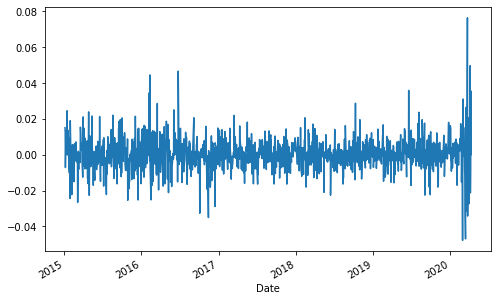

In [6]:
GOLD['simple_return'].plot(figsize=(8, 5))
plt.show()

Calculate the average daily return.

In [7]:
avg_returns_d = GOLD['simple_return'].mean()
avg_returns_d

0.00033020740888567467

Estimate the average annual return.

In [8]:
avg_returns_a = GOLD['simple_return'].mean() * 250
avg_returns_a

0.08255185222141867

In [9]:
print (str(round(avg_returns_a, 4) * 100) + ' %')

8.260000000000002 %


## Log Returns

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [10]:
GOLD.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
2015-01-02,1194.500000,1169.500000,1184.000000,1186.000000,92.0,1186.000000,NaN
2015-01-05,1206.900024,1180.099976,1180.300049,1203.900024,138.0,1203.900024,0.015093
2015-01-06,1220.000000,1203.500000,1203.500000,1219.300049,470.0,1219.300049,0.012792
2015-01-07,1219.199951,1210.599976,1219.199951,1210.599976,97.0,1210.599976,-0.007135
2015-01-08,1215.699951,1206.300049,1207.000000,1208.400024,29.0,1208.400024,-0.001817


In [11]:
GOLD['log_return'] = np.log(GOLD['Adj Close'] / GOLD['Adj Close'].shift(1))
print (GOLD['log_return'])

Date
2015-01-02         NaN
2015-01-05    0.014980
2015-01-06    0.012711
2015-01-07   -0.007161
2015-01-08   -0.001819
                ...   
2020-04-06    0.048478
2020-04-07   -0.021492
2020-04-08   -0.007823
2020-04-09    0.035020
2020-04-09    0.000000
Name: log_return, Length: 1330, dtype: float64


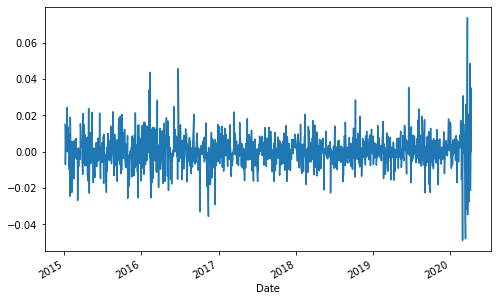

In [12]:
GOLD['log_return'].plot(figsize=(8, 5))
plt.show()

In [13]:
log_return_d = GOLD['log_return'].mean()
log_return_d

0.0002886708553585458

In [14]:
log_return_a = GOLD['log_return'].mean() * 250
log_return_a

0.07216771383963645

In [15]:
print (str(round(log_return_a, 5) * 100) + ' %')

7.217 %


## Calculating the Return of a Portfolio of Securities

In [16]:
tickers = ['VTI','VEA','VWO','VSS','GC=F']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']
    

In [17]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1327 entries, 2015-01-02 to 2020-04-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VTI     1327 non-null   float64
 1   VEA     1327 non-null   float64
 2   VWO     1327 non-null   float64
 3   VSS     1327 non-null   float64
 4   GC=F    1316 non-null   float64
dtypes: float64(5)
memory usage: 62.2 KB


In [18]:
mydata.head()

,VTI,VEA,VWO,VSS,GC=F
Date,,,,,
2015-01-02,95.734566,32.296322,34.334988,82.514427,1186.000000
2015-01-05,94.089577,31.576527,33.788197,81.354805,1203.900024
2015-01-06,93.167686,31.225206,33.623295,80.524055,1219.300049
2015-01-07,94.279396,31.559397,34.395744,81.242310,1210.599976
2015-01-08,95.942467,32.039257,34.977257,81.778862,1208.400024


In [19]:
mydata.tail()

,VTI,VEA,VWO,VSS,GC=F
Date,,,,,
2020-04-03,123.379997,31.830000,32.669998,74.550003,1648.800049
2020-04-06,132.009995,33.540001,34.279999,78.580002,1730.699951
2020-04-07,132.160004,33.730000,34.480000,79.839996,1693.900024
2020-04-08,136.800003,34.049999,34.880001,81.239998,1680.699951
2020-04-09,139.360001,34.779999,34.820000,83.139999,1740.599976


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [20]:
mydata.iloc[0]

VTI       95.734566
VEA       32.296322
VWO       34.334988
VSS       82.514427
GC=F    1186.000000
Name: 2015-01-02 00:00:00, dtype: float64

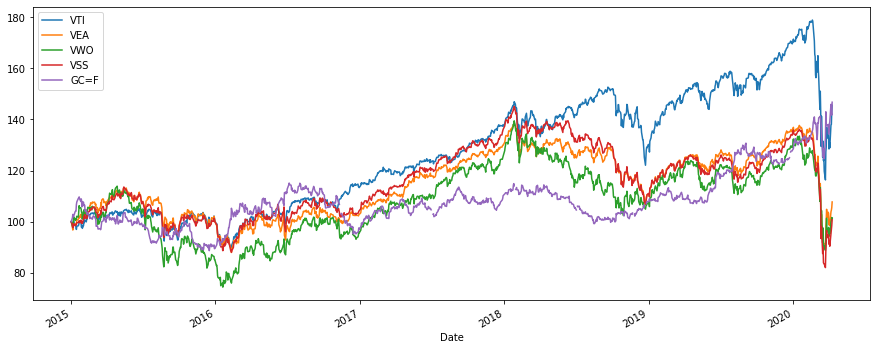

In [21]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [22]:
mydata.loc['2016-03-03']

VTI       93.768707
VEA       30.911325
VWO       29.221579
VSS       80.080803
GC=F    1257.400024
Name: 2016-03-03 00:00:00, dtype: float64

In [23]:
mydata.iloc[0]

VTI       95.734566
VEA       32.296322
VWO       34.334988
VSS       82.514427
GC=F    1186.000000
Name: 2015-01-02 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [24]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,VTI,VEA,VWO,VSS,GC=F
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.017183,-0.022287,-0.015925,-0.014054,0.015093
2015-01-06,-0.009798,-0.011126,-0.004880,-0.010211,0.012792
2015-01-07,0.011932,0.010703,0.022974,0.008920,-0.007135
2015-01-08,0.017640,0.015205,0.016907,0.006604,-0.001817


In [25]:
weights = np.array([0.50, 0.20, 0.10, 0.10, 0.10])

In [26]:
np.dot(returns, weights)

array([        nan, -0.01453745, -0.00735421, ...,  0.00176172,
        0.02158623,  0.01937525])

In [27]:
annual_returns = returns.mean() * 250
annual_returns

VTI     0.087534
VEA     0.030100
VWO     0.025382
VSS     0.016770
GC=F    0.087587
dtype: float64

In [28]:
np.dot(annual_returns, weights)

0.0627609051726226

In [29]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

6.276 %


## Calculating the Return of Indices 

In [30]:
tickers = ['^GSPC', '^IXIC', '^GDAXI','^DJI','^GDAXI','^N225','^SSEC','MSCI'] #'^FTSE' -london

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [31]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^DJI,^N225,^SSEC,MSCI
Date,,,,,,,
1997-01-02,737.010010,1280.699951,2820.810059,6442.490234,NaN,NaN,NaN
1997-01-03,748.030029,1310.680054,2863.260010,6544.089844,NaN,NaN,NaN
1997-01-06,747.650024,1316.400024,2890.199951,6567.180176,19446.000000,NaN,NaN
1997-01-07,753.229980,1327.729980,2876.340088,6600.660156,18896.189453,NaN,NaN
1997-01-08,748.409973,1320.349976,2904.080078,6549.479980,18680.380859,NaN,NaN


In [32]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^DJI,^N225,^SSEC,MSCI
Date,,,,,,,
2020-04-03,2488.649902,7373.080078,9525.769531,21052.529297,17820.189453,NaN,270.609985
2020-04-06,2663.679932,7913.240234,10075.169922,22679.990234,18576.300781,NaN,302.489990
2020-04-07,2659.409912,7887.259766,10356.700195,22653.859375,18950.179688,NaN,286.079987
2020-04-08,2749.979980,8090.899902,10332.889648,23433.570312,19353.240234,NaN,297.179993
2020-04-09,2789.820068,8153.580078,10564.740234,23719.369141,19345.769531,NaN,310.690002


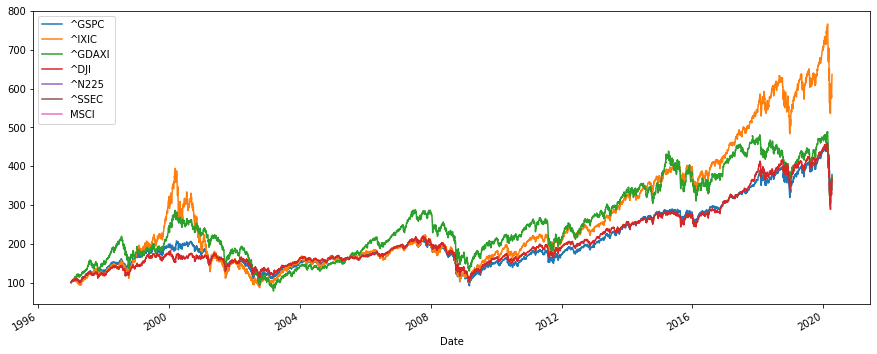

In [33]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

In [34]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^DJI,^N225,^SSEC,MSCI
Date,,,,,,,
2020-04-03,-0.015137,-0.015256,-0.004707,-0.016854,0.000082,NaN,-0.057075
2020-04-06,0.070331,0.073261,0.057675,0.077305,0.042430,NaN,0.117808
2020-04-07,-0.001603,-0.003283,0.027943,-0.001152,0.020127,NaN,-0.054250
2020-04-08,0.034056,0.025819,-0.002299,0.034418,0.021269,NaN,0.038800
2020-04-09,0.014487,0.007747,0.022438,0.012196,-0.000386,NaN,0.045461


In [35]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.076207
^IXIC     0.110896
^GDAXI    0.069611
^DJI      0.073506
^N225    -0.012163
^SSEC     0.065951
MSCI      0.272912
dtype: float64

In [36]:
tickers = ['VTI', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2008-1-1')['Adj Close']    

In [37]:
data_2.tail()

,VTI,^GSPC,^DJI
Date,,,
2020-04-03,123.379997,2488.649902,21052.529297
2020-04-06,132.009995,2663.679932,22679.990234
2020-04-07,132.160004,2659.409912,22653.859375
2020-04-08,136.800003,2749.979980,23433.570312
2020-04-09,139.360001,2789.820068,23719.369141


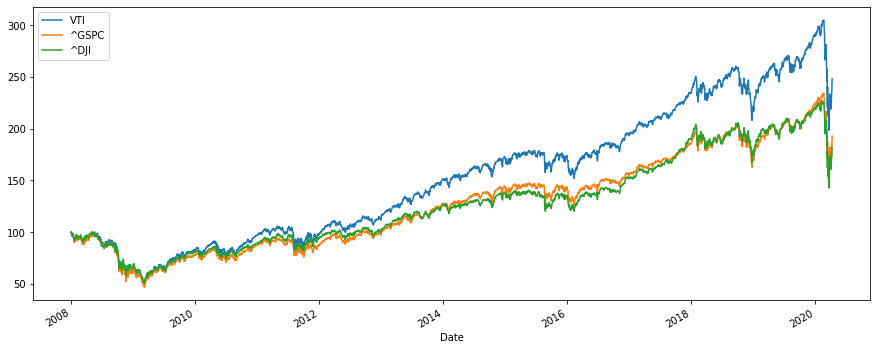

In [38]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

## Calculating the Risk of a Security

In [39]:
tickers = ['VTI', 'GC=F']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [40]:
sec_data.tail()

,VTI,GC=F
Date,,
2020-04-03,123.379997,1648.800049
2020-04-06,132.009995,1730.699951
2020-04-07,132.160004,1693.900024
2020-04-08,136.800003,1680.699951
2020-04-09,139.360001,1740.599976


In [41]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [42]:
sec_returns

,VTI,GC=F
Date,,
2007-01-03,NaN,NaN
2007-01-04,0.001999,-0.005116
2007-01-05,-0.007947,-0.030927
2007-01-08,0.003659,0.004289
2007-01-09,0.000000,0.009176
...,...,...
2020-04-03,-0.017196,0.006755
2020-04-06,0.067609,0.048478
2020-04-07,0.001136,-0.021492


## VTI

In [43]:
sec_returns['VTI'].mean()

0.00028453711503541974

In [44]:
sec_returns['VTI'].mean() * 250

0.07113427875885493

In [45]:
sec_returns['VTI'].std()

0.013100771684469846

In [46]:
sec_returns['VTI'].std() * 250 ** 0.5

0.2071413881438273

## GOLD

In [47]:
sec_returns['GC=F'].mean()

0.0002998437981752895

In [51]:
sec_returns['GC=F'].mean() * 250

0.07496094954382237

In [52]:
sec_returns['GC=F'].std()

0.011504998011601509

In [53]:
sec_returns['GC=F'].std() * 250 ** 0.5

0.18190999096184537

In [54]:
print (sec_returns['VTI'].mean() * 250)
print (sec_returns['GC=F'].mean() * 250)

0.07113427875885493
0.07496094954382237


In [56]:
sec_returns[['VTI', 'GC=F']].mean() * 250

VTI     0.071134
GC=F    0.074961
dtype: float64

In [57]:
sec_returns[['VTI', 'GC=F']].std() * 250 ** 0.5

VTI     0.207141
GC=F    0.181910
dtype: float64

## Calculating Covariance and Correlation 

\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [58]:
VTI_var = sec_returns['VTI'].var() 
VTI_var

0.00017163021872860688

In [76]:
GOLD_var = sec_returns['GC=F'].var() 
GOLD_var

0.00013236497924695465

In [77]:
VTI_var = sec_returns['VTI'].var() * 250
VTI_var

0.04290755468215172

In [78]:
GOLD_var = sec_returns['GC=F'].var() * 250
GOLD_var

0.03309124481173866

In [79]:
cov_matrix = sec_returns.cov()
cov_matrix

,VTI,GC=F
VTI,1.716302e-04,-2.791332e-08
GC=F,-2.791332e-08,1.323650e-04


In [63]:
cov_matrix_a = sec_returns.cov() * 250
cov_matrix_a

,VTI,GC=F
VTI,0.042908,-0.000007
GC=F,-0.000007,0.033091


In [64]:
corr_matrix = sec_returns.corr()
corr_matrix

,VTI,GC=F
VTI,1.000000,-0.000186
GC=F,-0.000186,1.000000


## Calculating Portfolio Risk

In [65]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [66]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.018996210707989868

Portfolio Volatility:

In [68]:
pfolio_vol = (np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.13782674162871975

In [69]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

13.783000000000001 %


## Idiosyncratic Risk & Systematic
## Calculating Diversifiable and Non-Diversifiable Risk of a Portfolio

In [70]:
weights = np.array([0.5, 0.5])

In [71]:
weights[0]

0.5

In [72]:
weights[1]

0.5

Diversifiable Risk:

In [86]:
VTI_var_a = sec_returns['VTI'].var() * 250
VTI_var_a

0.04290755468215172

In [87]:
GOLD_var_a = sec_returns['GC=F'].var() * 250
GOLD_var_a

0.03309124481173866

In [88]:
dr = pfolio_var - (weights[0] ** 2 * VTI_var_a) - (weights[1] ** 2 * GOLD_var_a)
dr

-3.489165482727097e-06

In [89]:
print (str(round(dr*100, 3)) + ' %')

-0.0 %


Non-Diversifiable Risk:

In [90]:
n_dr_1 = pfolio_var - dr
n_dr_1

0.018999699873472595

In [92]:
n_dr_2 = (weights[0] ** 2 * VTI_var_a) + (weights[1] ** 2 * GOLD_var_a)
n_dr_2

0.018999699873472595

In [93]:
n_dr_1 == n_dr_2

True

https://www.youtube.com/watch?v=PYUYg9xKYD0